In [1]:
!pip install matplotlib
!pip install pandas

In [2]:
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches #for waffle chart
import numpy as np

mpl.style.use('ggplot')

!pip install seaborn

from PIL import Image
import seaborn as seaborn
import wordcloud


<h1>Fetching data</h1>

In [3]:
df_can = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv")
print("Data read perfectly")

Data read perfectly


In [4]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [5]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [6]:
print(df_can.shape)

(195, 39)


In [7]:
df_can.set_index('Country', inplace = True)

<h1>Waffle chart</h1>

In [8]:
#making chart for 3 countries

df_dsn = df_can.loc[['Denmark','Norway','Sweden'],:]

df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [9]:
#Creating waffle chart manually

total_values = df_dsn['Total'].sum()
category_proportion= df_dsn['Total']/total_values

pd.DataFrame({'category proportion': category_proportion})

,category proportion
Country,
Denmark,0.322557
Norway,0.192409
Sweden,0.485034


In [10]:
#Defining size of chart
width =40
height = 10

total_num_tiles = width*height
print(f'Total number of tiles is {total_num_tiles}.')

Total number of tiles is 400.


In [11]:
#Using proportion of each category to determine it respective number of tiles

tiles_per_category = (category_proportion * total_num_tiles).round().astype(int)
pd.DataFrame({'Number of tiles': tiles_per_category})

,Number of tiles
Country,
Denmark,129
Norway,77
Sweden,194


In [14]:
#Creating matrix that resembles waffle chart and populating it

waffle_chart = np.zeros((height,width), dtype = np.uint)

#define indices to loop through waffle chart

category_index = 0;
title_index =0;

for col in range(width):
    for row in range(height):
        title_index += 1

        if title_index > sum(tiles_per_category[0: category_index]):
            category_index +=1

        waffle_chart[row,col] = category_index

print('Waffle chart populated!')

Waffle chart populated!


In [15]:
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

<Figure size 640x480 with 0 Axes>

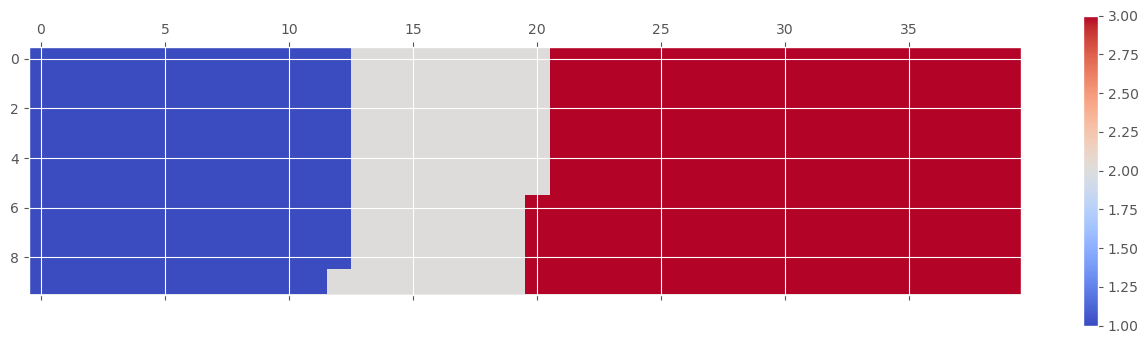

In [16]:
#Mapping the waffle chart

fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap = colormap)
plt.colorbar()
plt.show()

<Figure size 640x480 with 0 Axes>

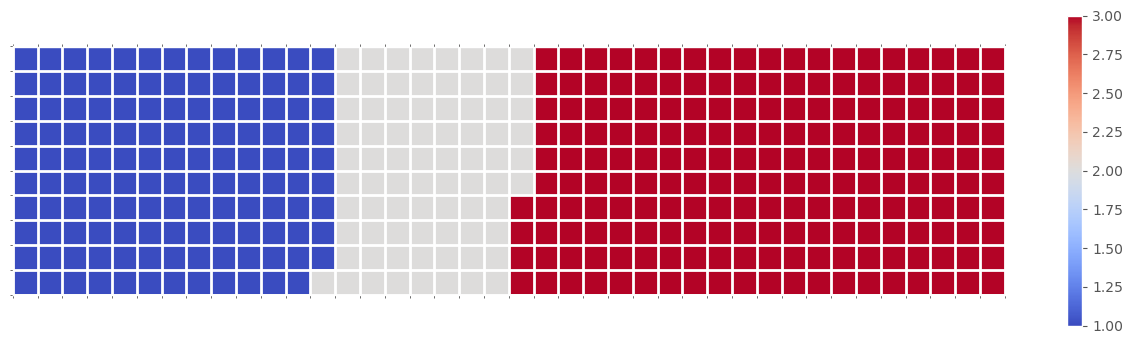

In [19]:
#Making the chart better

fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap = colormap)
plt.colorbar()

ax = plt.gca()
ax.set_xticks(np.arange(-.5, (width),1),minor = True)
ax.set_yticks(np.arange(-.5,(height),1),minor = True)

ax.grid(which = 'minor', color = 'w', linestyle = '-', linewidth =2)

plt.xticks([])
plt.yticks([])
plt.show()

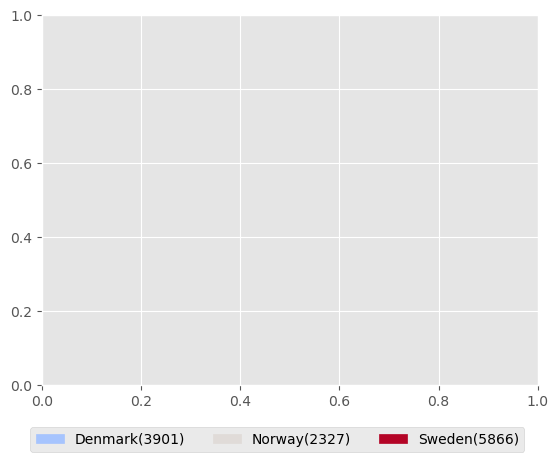

In [40]:
#Creating a legend

values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum.iloc[len(values_cumsum)-1]

legend_handles = []
for i,category in enumerate(df_dsn.index.values):
    label_str = category + '(' + str(df_dsn['Total'].iloc[i]) + ')'
    color_val = colormap(float(values_cumsum.iloc[i])/total_values)
    legend_handles.append(mpatches.Patch(color = color_val,label = label_str))

plt.legend(handles = legend_handles,

    loc = 'lower center',
    ncol = len(df_dsn.index.values),
    bbox_to_anchor=(0.,-0.2,0.95,.1)
)

plt.show()


In [41]:
#Making waffle chatrt

width = 40
height = 10

categories = df_dsn.index.values
values = df_dsn['Total']

colormap = plt.cm.coolwarm


Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


C:\Users\dhyan\AppData\Local\Temp\ipykernel_18908\3688471799.py:61: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_values = values_cumsum[len(values_cumsum) - 1]
C:\Users\dhyan\AppData\Local\Temp\ipykernel_18908\3688471799.py:69: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_str = category + ' (' + value_sign + str(values[i]) + ')'
C:\Users\dhyan\AppData\Local\Temp\ipykernel_18908\3688471799.py:71: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position,

<Figure size 640x480 with 0 Axes>

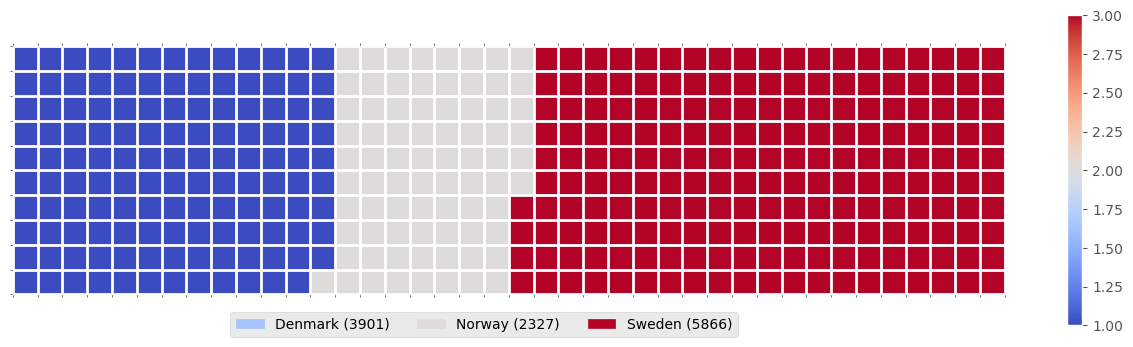

In [42]:
create_waffle_chart(categories,values, height,width,colormap)

<h1>Waffle chart with pywaffle</h1>

In [44]:
!pip install pywaffle

   ---------------------------------------- 0.0/25.6 MB ? eta -:--:--
   - -------------------------------------- 1.0/25.6 MB 13.4 MB/s eta 0:00:02
   - -------------------------------------- 1.0/25.6 MB 13.4 MB/s eta 0:00:02
   - -------------------------------------- 1.0/25.6 MB 13.4 MB/s eta 0:00:02
   - -------------------------------------- 1.0/25.6 MB 13.4 MB/s eta 0:00:02
   ---- ----------------------------------- 2.6/25.6 MB 2.5 MB/s eta 0:00:10
   ------- -------------------------------- 5.0/25.6 MB 4.0 MB/s eta 0:00:06
   ----------- ---------------------------- 7.3/25.6 MB 5.1 MB/s eta 0:00:04
   -------------- ------------------------- 9.4/25.6 MB 5.8 MB/s eta 0:00:03
   ----------------- ---------------------- 11.5/25.6 MB 6.3 MB/s eta 0:00:03
   --------------------- ------------------ 13.6/25.6 MB 6.8 MB/s eta 0:00:02
   ------------------------ --------------- 16.0/25.6 MB 7.2 MB/s eta 0:00:02
   --------------------------- ------------ 17.8/25.6 MB 7.4 MB/s eta 0:00:0

In [45]:
from pywaffle import Waffle 

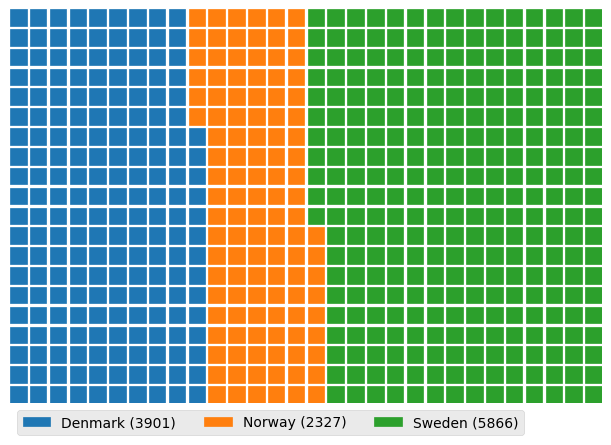

In [54]:
fig = plt.figure(FigureClass = Waffle,
                rows = 20, columns = 30,
                values = df_dsn['Total'],
                cmap_name = 'tab10',
                legend = {'labels': [f"{k} ({v})" for k,v in zip(df_dsn.index.values, df_dsn.Total)],
                         'loc' : 'lower left', 'bbox_to_anchor': (0, -0.1),'ncol':3
                         }   
)
plt.show()

<h1>Waffle chart to display proportion of india and china immigrants</h1>

In [55]:
from pywaffle import Waffle as waffle_chart

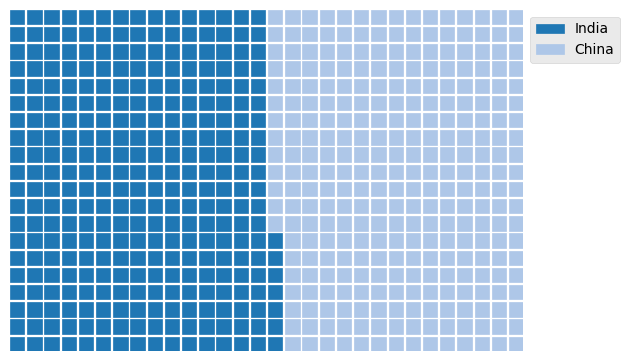

In [57]:
data_CI = df_can.loc[['India','China']]

fig = plt.figure(
    FigureClass = waffle_chart,
    rows = 20,
    columns = 30,
    values = data_CI['Total'],
    cmap_name = 'tab20',
    legend={

        'labels': data_CI.index.tolist(),
        'loc': 'upper left',
        'bbox_to_anchor':(1.0,1.0),
        'ncol':1
        
    }
)

plt.show()

<h1>Word Cloud</h1>

In [59]:
from wordcloud import WordCloud,STOPWORDS
print('Wordcloud imported!')

Wordcloud imported!


In [62]:
import urllib

#OPENING AND READING PARAGRAPH

alice_novel = urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt').read().decode("UTF-8")

In [61]:
stopwords = set(STOPWORDS)

In [63]:
alice_wc= WordCloud()
alice_wc.generate(alice_novel)

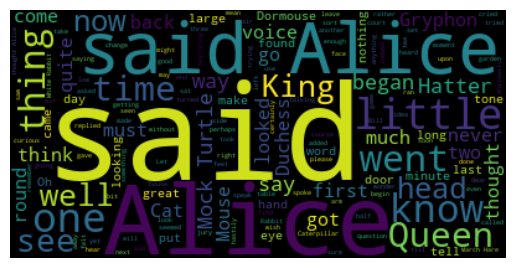

In [66]:
plt.imshow(alice_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

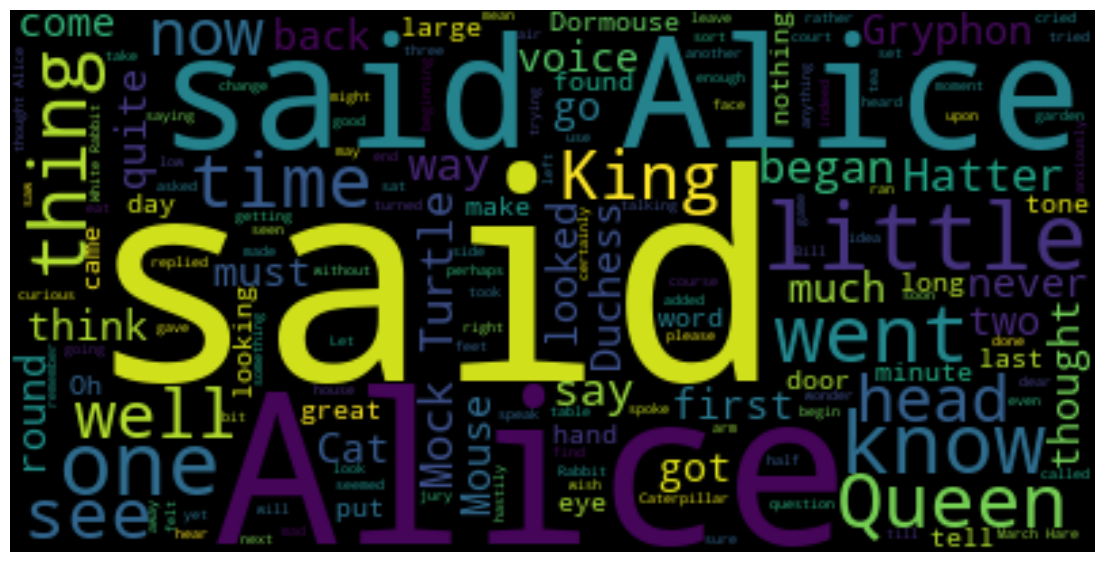

In [67]:
#Resizing the cloud to see less frequent words better

fig = plt.figure(figsize=(14,18))
plt.imshow(alice_wc,interpolation = 'bilinear')
plt.axis('off')
plt.show()

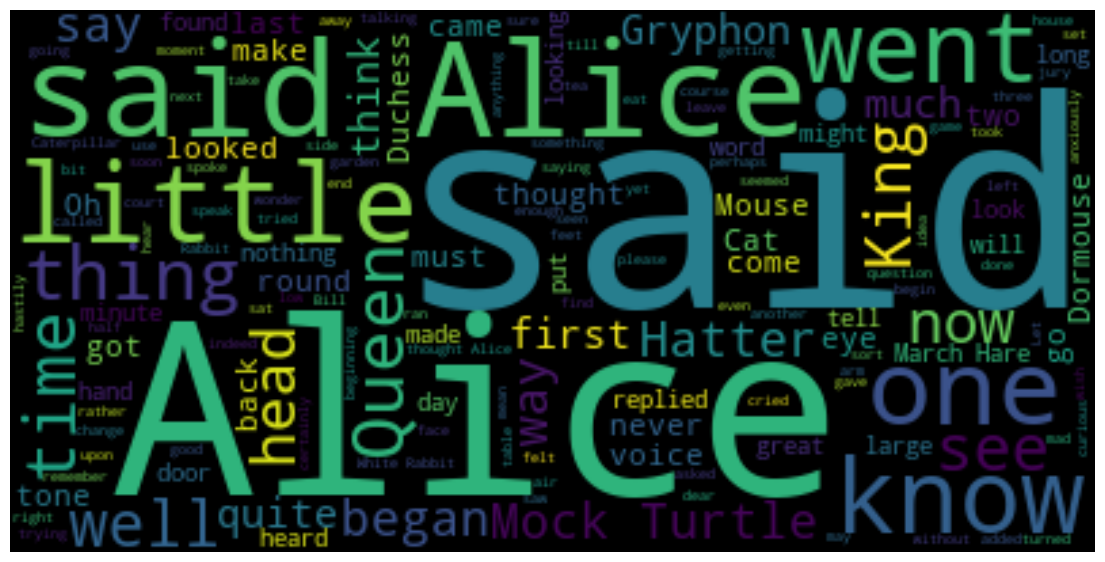

In [71]:
#Adding said to stopword as its not useful

stopwords.add('said')
stopwords.add('Said')

alice_wc.generate(alice_novel)

fig = plt.figure(figsize=(14,18))

plt.imshow(alice_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [72]:
#Shaping wordcloud in mask

alice_mask = np.array(Image.open(urllib.request.urlopen("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png")))


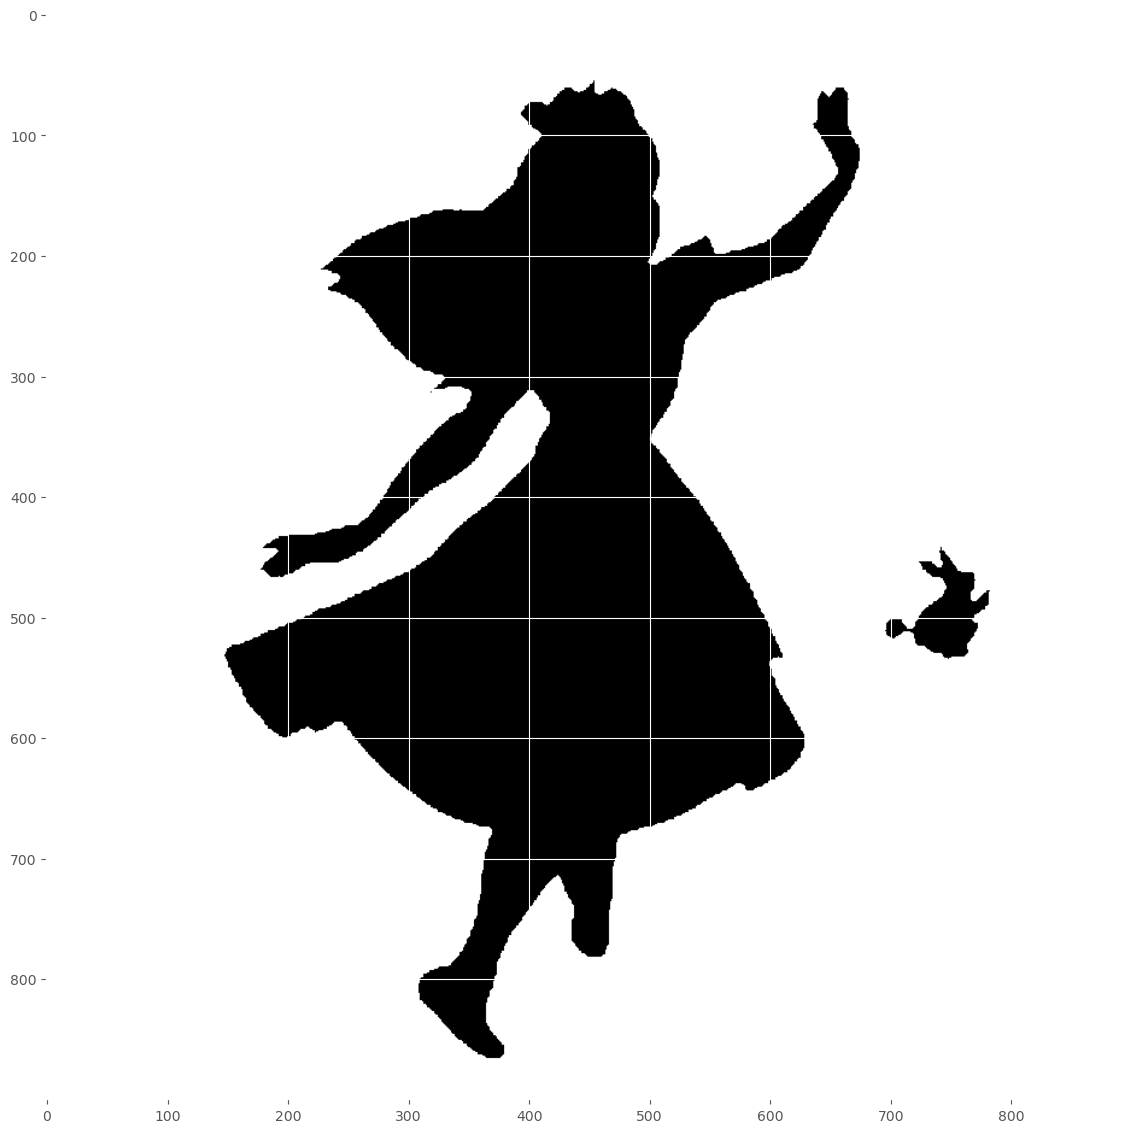

In [73]:
fig =plt.figure(figsize=(14,18))
plt.imshow(alice_mask,cmap =plt.cm.gray, interpolation = 'bilinear')
plt.show()

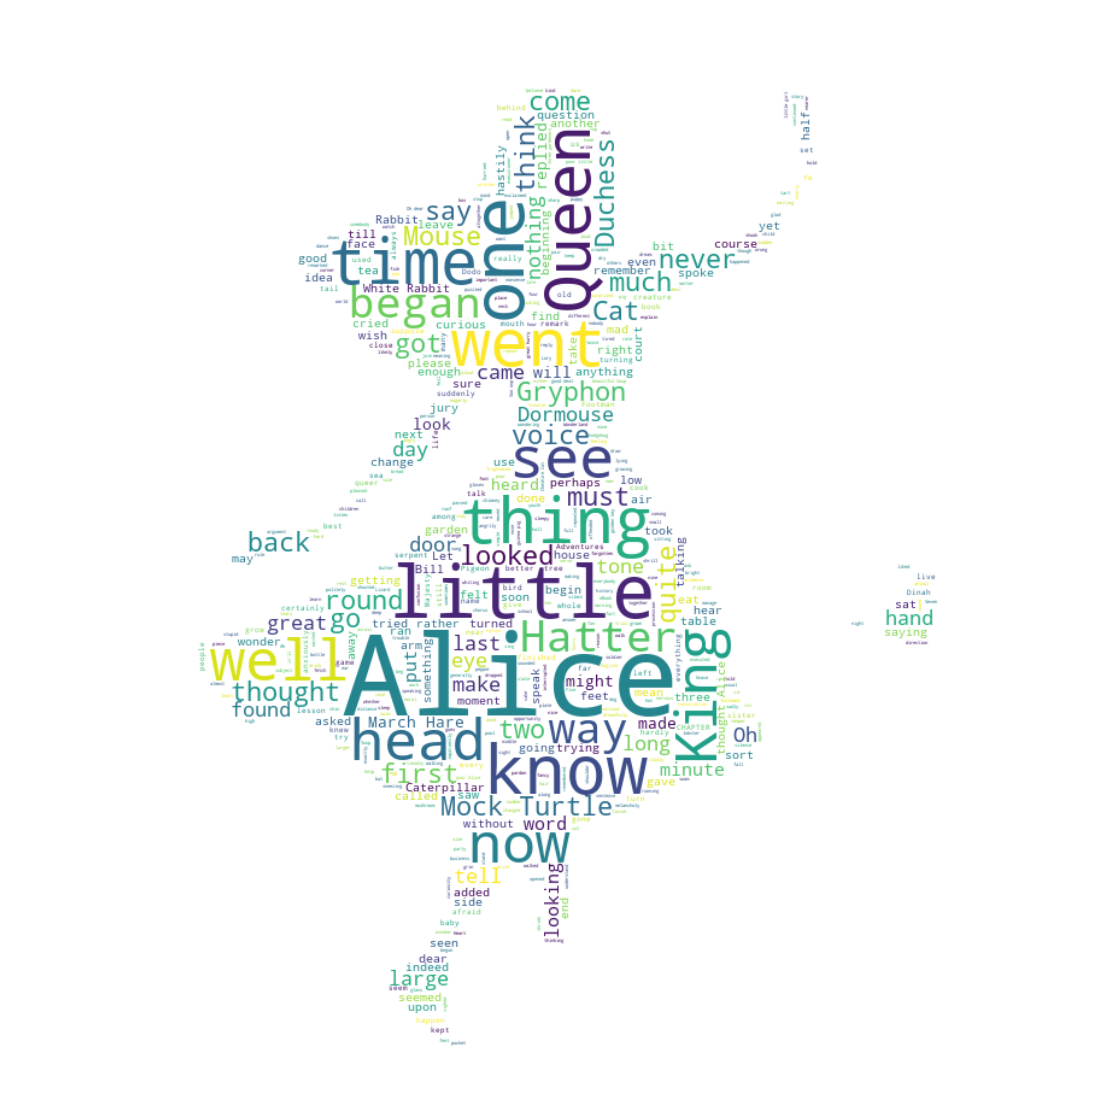

In [76]:
alice_wc= WordCloud(background_color = 'white', max_words = 1000, mask = alice_mask, stopwords = stopwords)

alice_wc.generate(alice_novel)
fig = plt.figure(figsize=(14,18))

plt.imshow(alice_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [77]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


<h1>Wordcloud for immigration data</h1>

In [79]:
total_immigration = df_can['Total'].sum()
total_immigration

np.int64(6409153)

In [80]:
max_words = 90
word_string = ''
for country in df_can.index.values:

    if country.count(" ")==0:
        repeat_num_times = int(df_can.loc[country,'Total']/total_immigration*max_words)
        word_string = word_string + ((country + ' ')* repeat_num_times)
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [83]:
wordcloud = WordCloud(background_color = 'white').generate(word_string)
print('Word cloud created!')

Word cloud created!


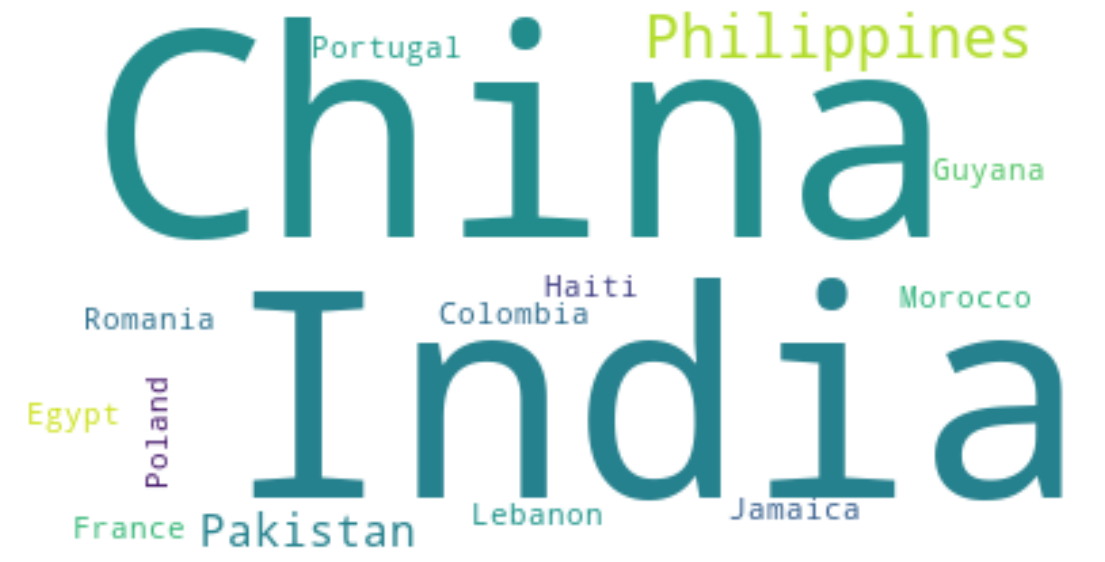

In [84]:
plt.figure(figsize =(14,18))

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

<h1>Plotting with seaborn</h1>

<h1>Countplot</h1>

In [87]:
import seaborn as sns

df_can['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania',
       'Latin America and the Caribbean', 'Northern America'],
      dtype=object)

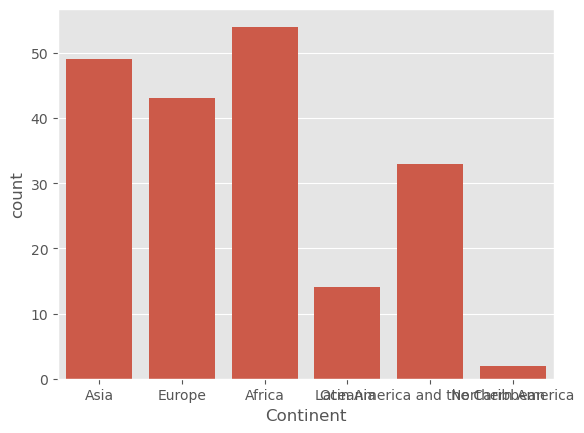

In [90]:
sns.countplot(x= 'Continent', data = df_can)

df_can1= df_can.replace('Latin America and the caribbean','L-America')
df_can1 = df_can1.replace('Northern America','N-America')


<Axes: xlabel='Continent', ylabel='count'>

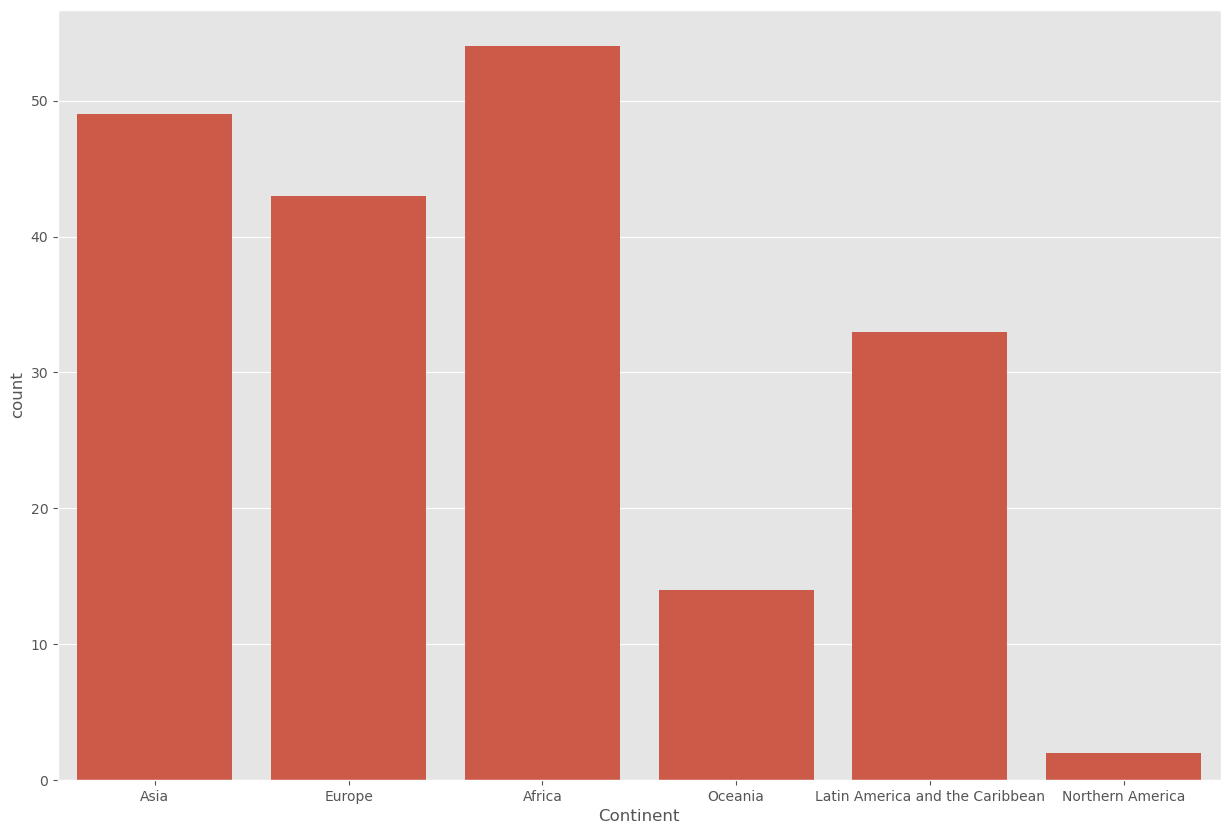

In [89]:
#Improving labels on x axis

df_can1= df_can.replace('Latin America and the caribbean','L-America')
df_can2 = df_can1.replace('Northern America', 'N-America')

plt.figure(figsize=(15,10))
sns.countplot(x='Continent', data = df_can1)

<h1>Barplot</h1>

Continent
Africa                              11462.000000
Asia                                67710.081633
Europe                              32812.720930
Latin America and the Caribbean     23186.303030
N-America                          120571.000000
Oceania                              3941.000000
Name: Total, dtype: float64

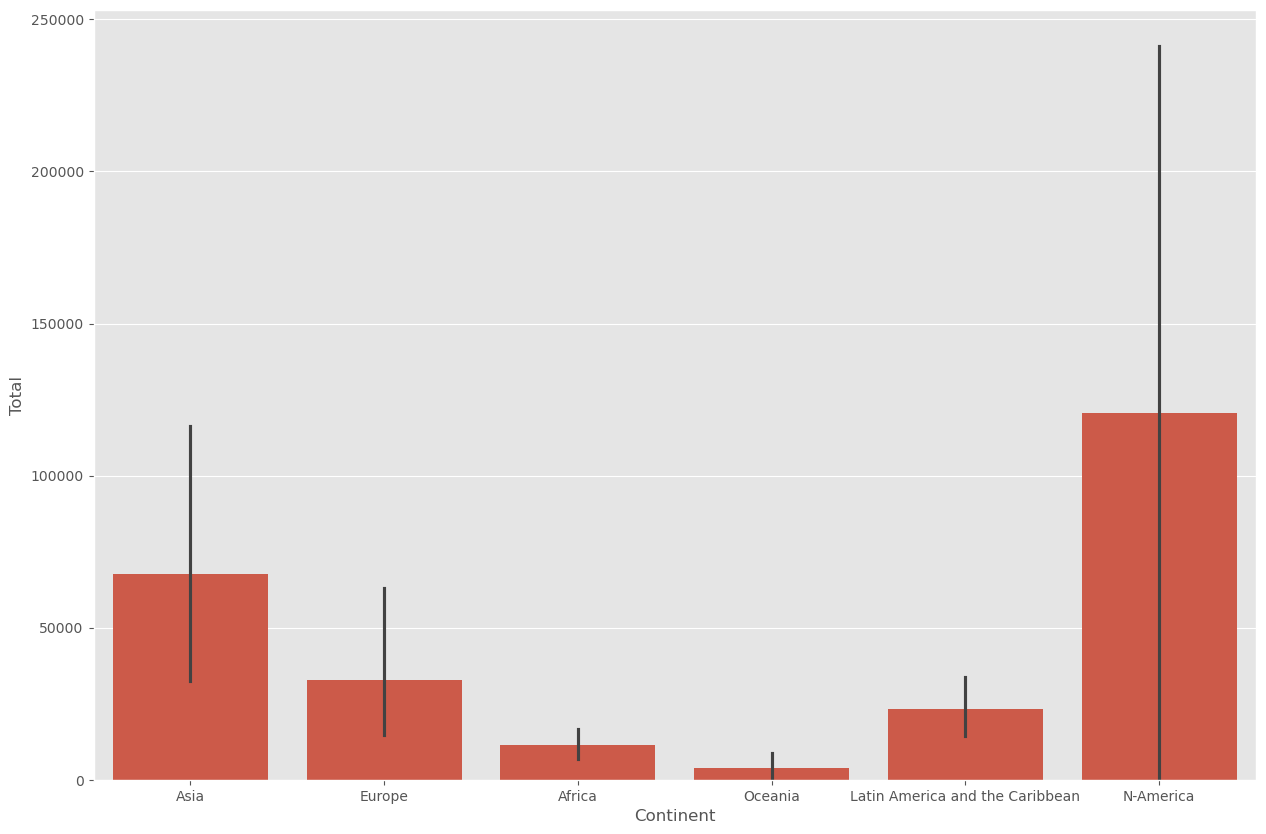

In [94]:
plt.figure(figsize=(15,10))
sns.barplot(x='Continent', y ="Total", data = df_can1)

df_Can2 = df_can1.groupby('Continent')['Total'].mean()
df_Can2

<h1>Regression plot from year 1980 to 2013</h1>

In [96]:
years = list(map(str,range(1980,2014)))

df_tot = pd.DataFrame(df_can[years].sum(axis =0))

df_tot.index = map(float, df_tot.index)

df_tot.reset_index(inplace= True)

df_tot.columns = ['year','total']

df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


<Axes: xlabel='year', ylabel='total'>

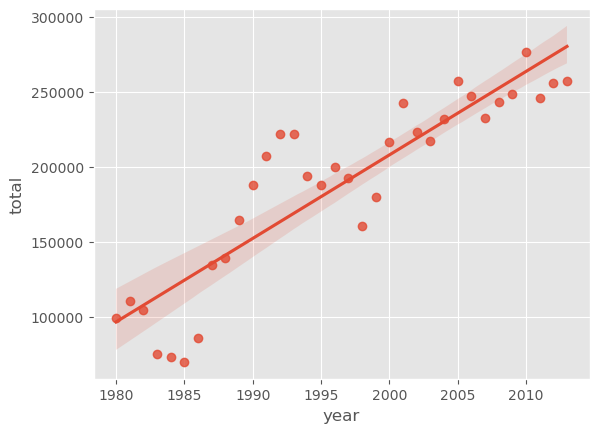

In [97]:
sns.regplot(x='year', y ='total', data = df_tot)

<Axes: xlabel='year', ylabel='total'>

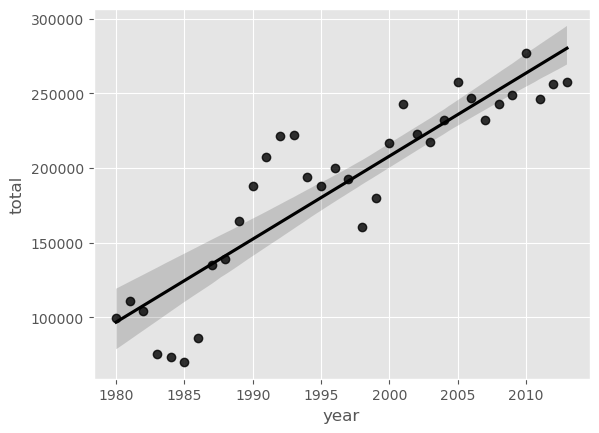

In [107]:
sns.regplot(x='year',y='total',data =df_tot, color = 'black')

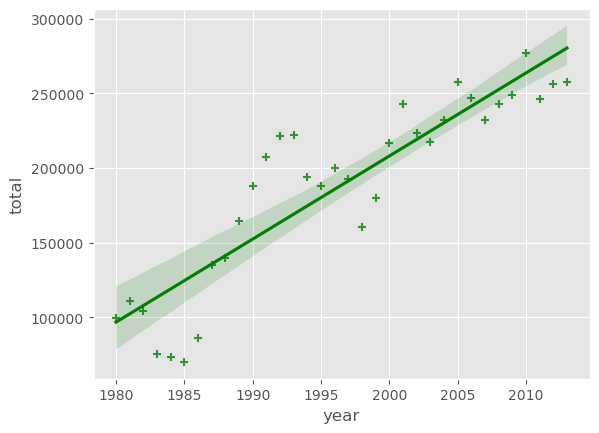

In [114]:
ax = sns.regplot(x='year', y='total', data = df_tot,color = 'green',marker = '+')
plt.show()

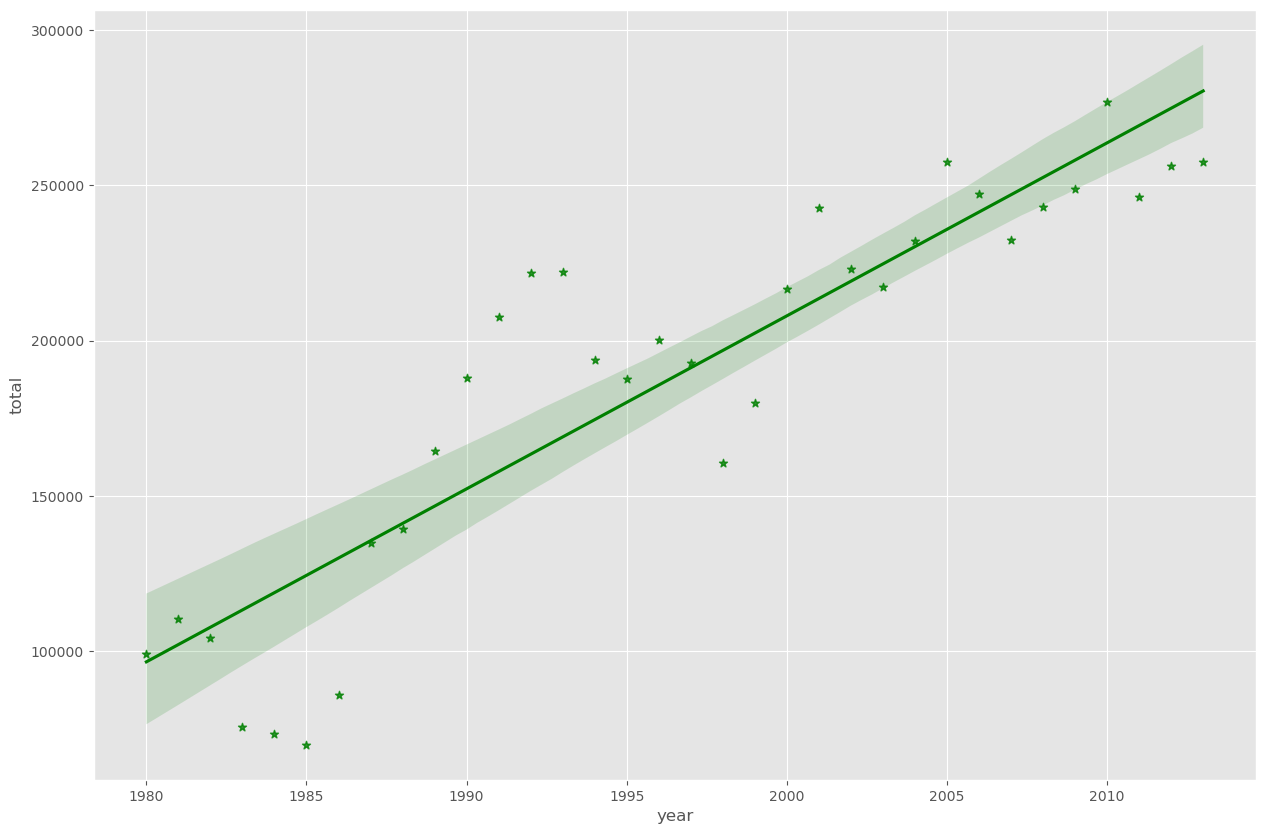

In [117]:
#Making the plot better

plt.figure(figsize=(15,10))
sns.regplot(x = 'year', y='total', data = df_tot, color = 'green', marker ='*')
plt.show()

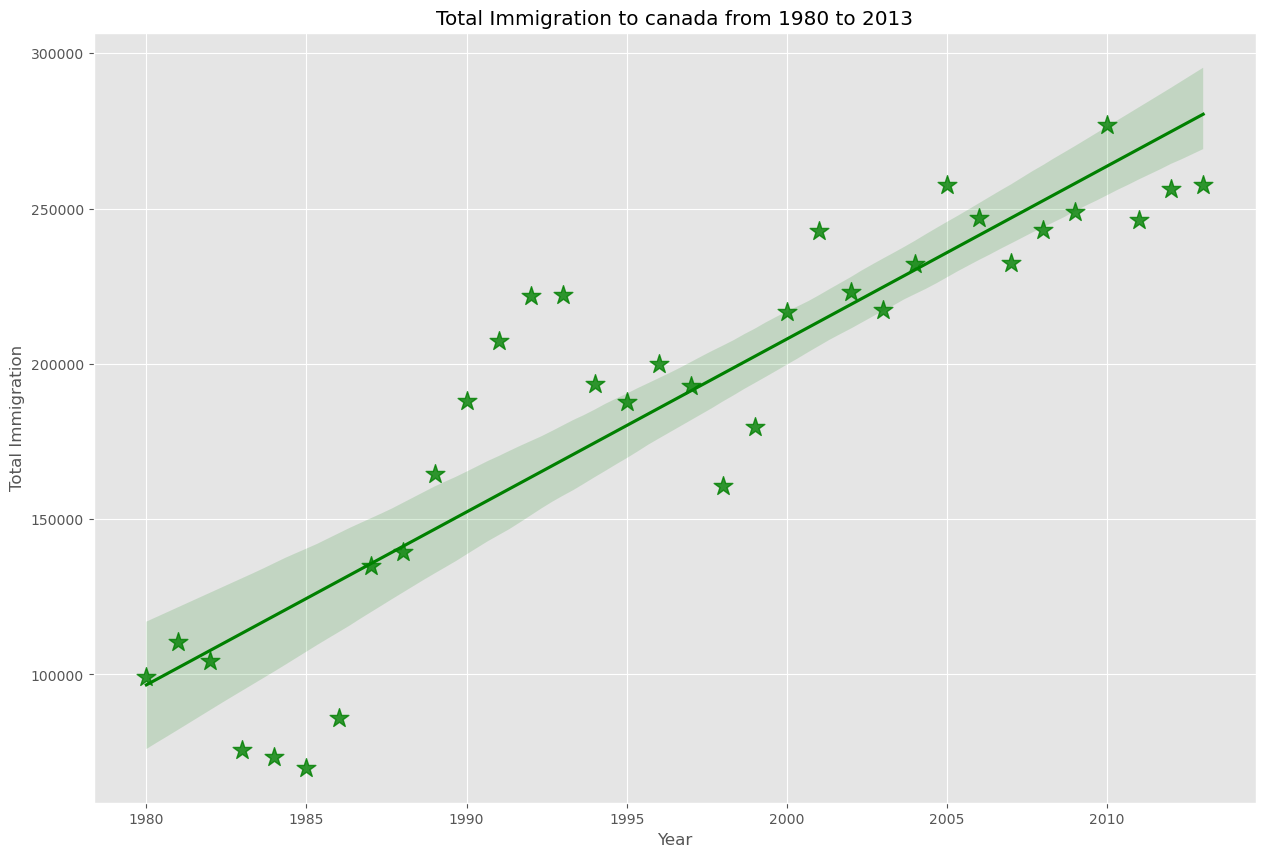

In [120]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='*', scatter_kws={'s': 200})



ax.set(xlabel = 'Year', ylabel ='Total Immigration')
ax.set_title('Total Immigration to canada from 1980 to 2013')
plt.show()

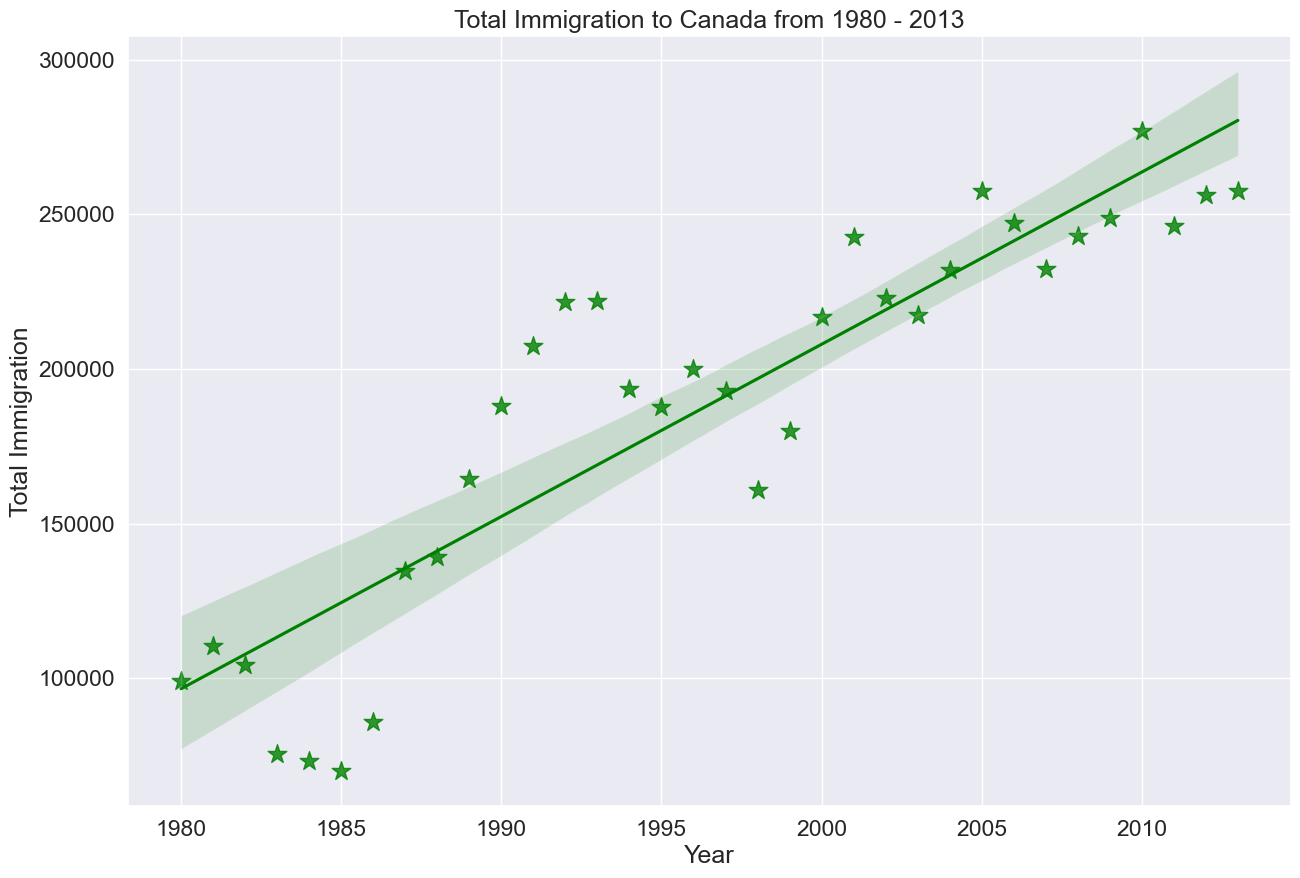

In [122]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='*', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

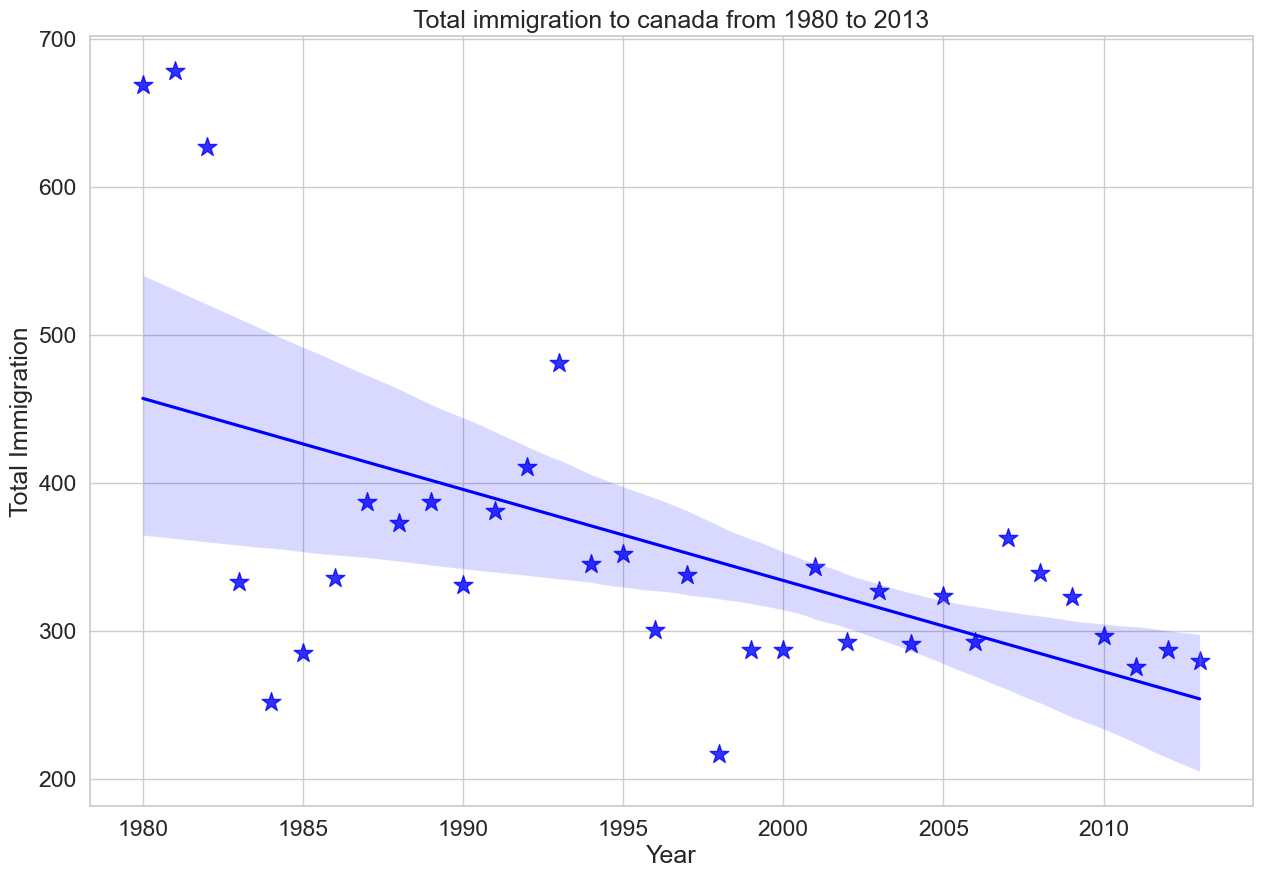

In [130]:
df_countries = df_can.loc[['Denmark','Norway','Sweden'],years].transpose()

df_total = pd.DataFrame(df_countries.sum(axis=1))

df_total = pd.DataFrame(df_countries.sum(axis =1))

df_total.reset_index(inplace = True)

df_total.columns = ['year','total']

df_total['year'] = df_total['year'].astype(int)

plt.figure(figsize=(15,10))

sns.set(font_scale= 1.5)
sns.set_style('whitegrid')

ax= sns.regplot(x='year', y = 'total',data = df_total, color ='blue', marker = "*", scatter_kws={'s':200})
ax.set(xlabel = 'Year', ylabel = 'Total Immigration')
ax.set_title('Total immigration to canada from 1980 to 2013')
plt.show()